In [96]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import joblib 



In [97]:
# Load the data
df=pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [98]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [99]:
# calculate correlation 
corr=df.corr()
corr

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


In [100]:
df.notnull()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,True,True,True,True,True,True,True,True,True,True,True,True
1186,True,True,True,True,True,True,True,True,True,True,True,True
1187,True,True,True,True,True,True,True,True,True,True,True,True
1188,True,True,True,True,True,True,True,True,True,True,True,True


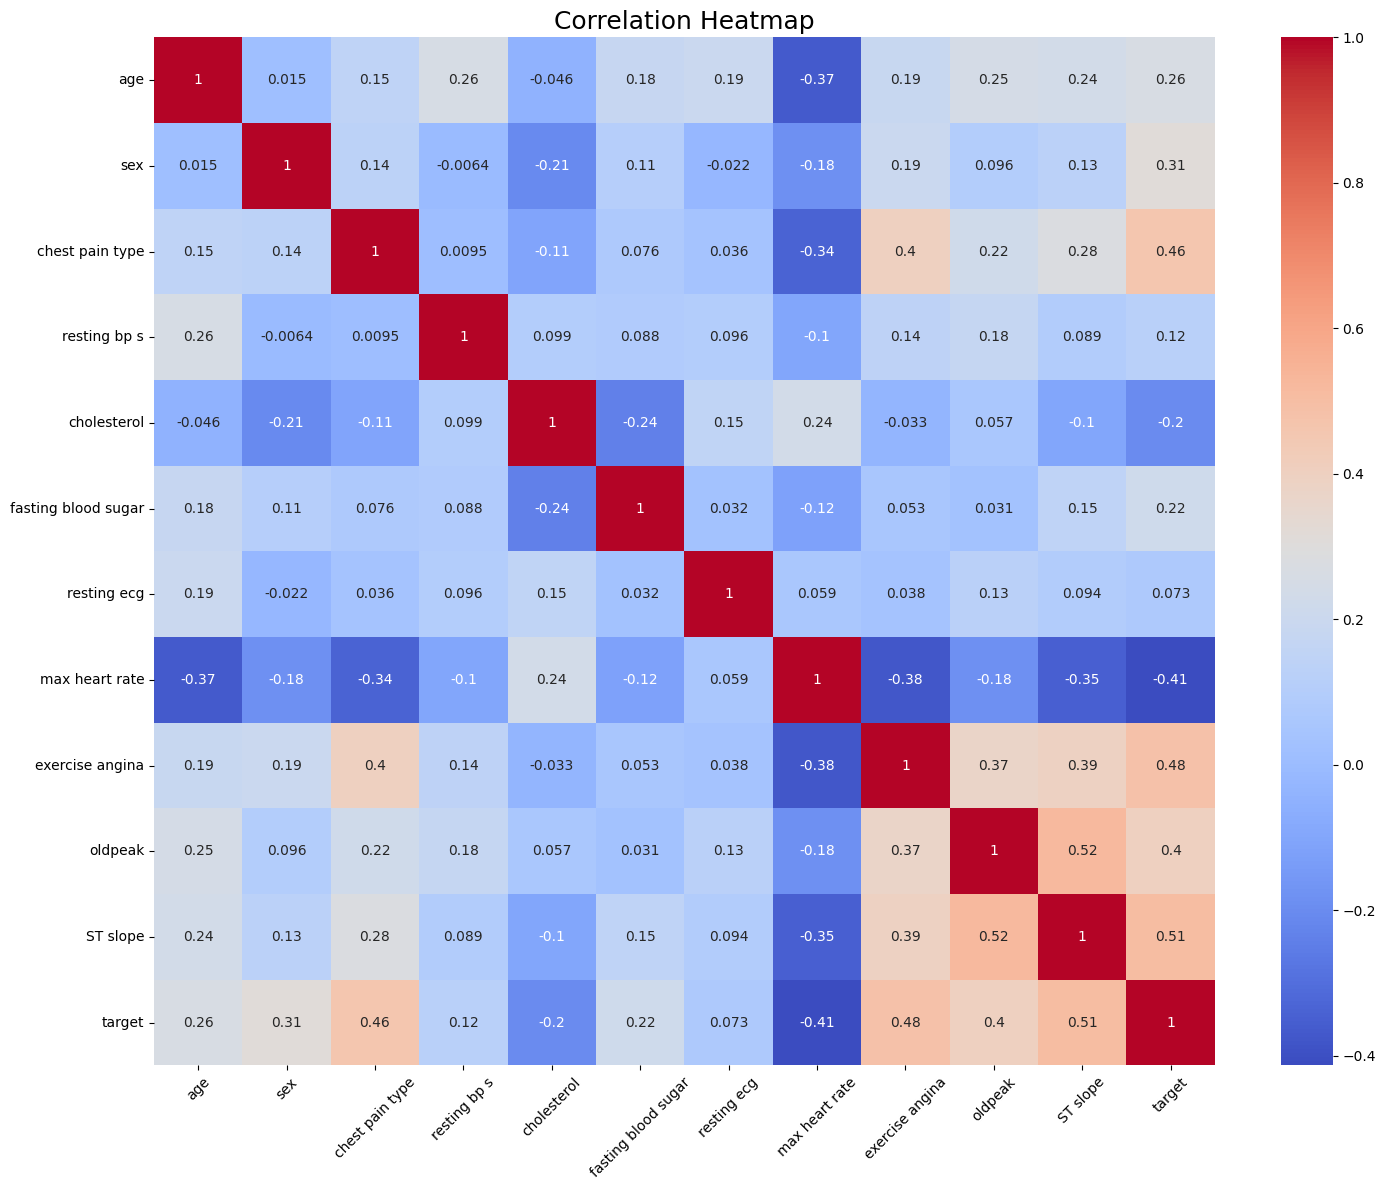

In [101]:
# Plot the heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.xticks(rotation=45)  
plt.yticks(rotation=0)
plt.title("Correlation Heatmap",fontsize=18)
plt.tight_layout()
plt.show()


In [102]:
# preprocessing the data
X=df.drop("target",axis=1)
y=df["target"]
X
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled
X_test_scaled

array([[ 0.76206645,  0.56764621,  0.8175941 , ..., -0.77807216,
         0.0862159 ,  0.61805709],
       [ 0.01982576,  0.56764621, -0.24717961, ...,  1.28522783,
         0.54220223,  0.61805709],
       [ 0.12586014, -1.76166066, -1.31195333, ..., -0.77807216,
        -0.82575675, -1.00733062],
       ...,
       [ 0.12586014, -1.76166066, -1.31195333, ..., -0.77807216,
         0.45100496,  0.61805709],
       [-1.14655248,  0.56764621,  0.8175941 , ...,  1.28522783,
         0.99818855,  0.61805709],
       [ 0.12586014,  0.56764621,  0.8175941 , ...,  1.28522783,
         0.72459676,  2.2434448 ]])

In [104]:
models={
    "Logistic Regression":LogisticRegression(),
    "K-Nearest Neighbors":KNeighborsClassifier(),
    "Support Vector Machine":SVC(),
    "Random Forest":RandomForestClassifier()
}

results=[]

for name , model in models.items():
    model.fit(X_train_scaled,y_train)

    y_pred=model.predict(X_test_scaled)
    
    
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    


    results.append([name,accuracy,precision,recall,f1])

df_res=pd.DataFrame(results,columns=["Model","Accuracy","Precision","Recall","F1"])
df_res
    

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.861345,0.871212,0.877863,0.874525
1,K-Nearest Neighbors,0.886555,0.871429,0.931298,0.900369
2,Support Vector Machine,0.890756,0.867133,0.946565,0.905109
3,Random Forest,0.928571,0.931818,0.938931,0.935361


In [105]:
joblib.dump(models["Random Forest"],"random_forest_heart_disease_model.pkl")
joblib.dump(scaler,"scaler_heart_disease.pkl")

['scaler_heart_disease.pkl']